In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
from decimal import Decimal

In [2]:
#by_60211642
data = pd.read_csv("./코로나바이러스감염증-19_확진환자_발생현황_221126.csv", header = 0)
data.tail(10)

df_covid = data.loc[:,['일자','계(명)','사망(명)']][:1042]
df_covid3 = data.loc[:,['일자','계(명)','사망(명)']][57:1042]
df_accumulate = data.loc[:,['일자','계(명)','사망(명)']][1042:1043] 

In [3]:
df_covid.isna().sum()

df_covid = df_covid.replace("-", 0).set_index('일자')

In [4]:
#누적 확진자 수 구하는 코드
df_covid["누적 확진자 수"] = df_covid["계(명)"]
def cumulative_number(i):
    if i == 0:
        df_covid["누적 확진자 수"][0] = int(df_covid["계(명)"][0])
    else:
        if type(df_covid["계(명)"][i]) != int :
            p = df_covid["계(명)"][i].split(",")
            str_confirmed = ""
            num_confirmed = 0
            for j in range(len(p)):
                str_confirmed+=p[j]
            df_covid["계(명)"][i] = int(str_confirmed)
            
        df_covid["누적 확진자 수"][i] = int(df_covid["누적 확진자 수"][i-1]) + df_covid["계(명)"][i]

for i in range(len(df_covid)):
    cumulative_number(i)

In [5]:
#누적 사망자 수 구하는 코드
df_covid["누적 사망자 수"] = df_covid["계(명)"]
def cumulative_number2(i):
    if i == 0:
        df_covid["누적 사망자 수"][0] = int(df_covid["사망(명)"][0])
    else:
        if type(df_covid["사망(명)"][i]) != int :
            p = df_covid["사망(명)"][i].split(",")
            str_confirmed = ""
            num_confirmed = 0
            for j in range(len(p)):
                str_confirmed+=p[j]
            df_covid["사망(명)"][i] = int(str_confirmed)
            
        df_covid["누적 사망자 수"][i] = int(df_covid["누적 사망자 수"][i-1]) + df_covid["사망(명)"][i]

for i in range(len(df_covid)):
    cumulative_number2(i)

In [6]:
#감염률 구하는 코드
df_covid["감염률"] = df_covid["계(명)"]
def infection_rate(i):
    rok_pop = 51628117
    if i == 0:
        df_covid["감염률"][0] = int(df_covid["계(명)"][0])/rok_pop
    else:
        #분모 (전체 국민 - 당일의 누적 확진자 수)
        denominator = (rok_pop - df_covid["누적 확진자 수"][i-1])
        #분자 (당일의 확진자 수)
        numerator = df_covid["계(명)"][i]
        p_infection = numerator/denominator
        df_covid["감염률"][i] = p_infection
            
    
for i in range(len(df_covid)):
    infection_rate(i)

In [7]:
#치명률 구하는 코드
df_covid["치명률"] = df_covid["누적 사망자 수"]
def death_rate(i):
    if i <17:
        df_covid["치명률"][0] = 0
    else:
        #분자 (누적 사망자 수)
        #분모 (17일 전 누적 확진자 수)
        p_lethality = int(df_covid["누적 사망자 수"][i])/int(df_covid["누적 확진자 수"][i-17])
        df_covid["치명률"][i] = p_lethality
            
    
for i in range(len(df_covid)):
    death_rate(i)

In [8]:
# 신천지 집단 감염 사태와 코로나 유행 초기인 걸 생각했을 때 앞부분 데이터가 신뢰도가 떨어질 것.
# 신천지 사태 한 달 후인 3월 17일 이후 데이터만 사용하는게 치명률에서 이상치를 줄일 수 있을 것이라 생각.
df_covid4 = df_covid.loc['2020.3.17':]

df_covid4.head(10)


,계(명),사망(명),누적 확진자 수,누적 사망자 수,감염률,치명률
일자,,,,,,
2020.3.17,84,6,8320,81,0.000002,0.027636
2020.3.18,93,3,8413,84,0.000002,0.023823
2020.3.19,152,7,8565,91,0.000003,0.021605
2020.3.20,87,3,8652,94,0.000002,0.019534
2020.3.21,147,8,8799,102,0.000003,0.019144
2020.3.22,98,2,8897,104,0.000002,0.018037
2020.3.23,64,7,8961,111,0.000001,0.017664
2020.3.24,76,9,9037,120,0.000001,0.017733
2020.3.25,100,6,9137,126,0.000002,0.017662


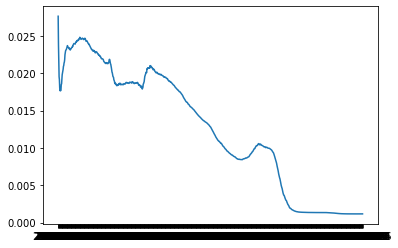

In [9]:
#치명률 그래프로 확인
plt.plot(df_covid3['일자'], df_covid4['치명률'])
plt.show()

In [10]:
#우세종에 따른 데이터 구간 나누기
df_covid_etc = df_covid4.loc[:"2021.7.31"]
df_covid_delta = df_covid4.loc["2021.8.1":"2022.1.24"]
df_covid_omi = df_covid4.loc["2022.1.25":]

In [11]:
#1 감염률 데이터 분석 
print("[1. 감염률 데이터 분석]")
#타입변환
df_covid_etc = df_covid_etc.astype({'감염률' : 'float'})
df_covid_delta = df_covid_delta.astype({'감염률' : 'float'})
df_covid_omi = df_covid_omi.astype({'감염률' : 'float'})

#정규성 검증
print("[정규성 검증]")
test_stat, p_val = stats.shapiro(df_covid_etc["감염률"])
print("Shapiro Test-statistics : {}, p-value : {}".format(test_stat, p_val))
test_stat, p_val = stats.shapiro(df_covid_delta["감염률"])
print("Shapiro Test-statistics : {}, p-value : {}".format(test_stat, p_val))
test_stat, p_val = stats.shapiro(df_covid_omi["감염률"])
print("Shapiro Test-statistics : {}, p-value : {}".format(test_stat, p_val))
print()

[1. 감염률 데이터 분석]
[정규성 검증]
Shapiro Test-statistics : 0.8471106886863708, p-value : 1.2466110643701716e-21
Shapiro Test-statistics : 0.835544228553772, p-value : 7.48299046424844e-13
Shapiro Test-statistics : 0.805178165435791, p-value : 7.125169911372918e-19



[등분산 검증]
Bartlett Test-statistics : 6103.233760704572, p-value : 0.0



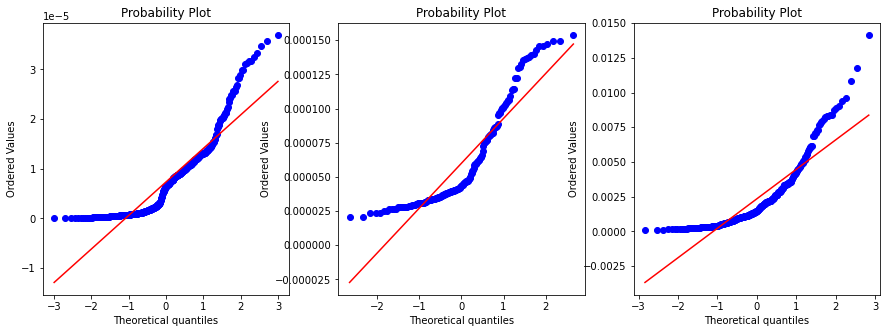

In [13]:
#등분산 검증 - 주석처리 해둔 것은 bartlett 말고 다른 등분산 검증 코드들. 값이 다르게 나옴
print("[등분산 검증]")
test_stat, p_val = stats.bartlett(df_covid_etc["감염률"],df_covid_delta["감염률"],df_covid_omi["감염률"])
print("Bartlett Test-statistics : {}, p-value : {}".format(test_stat, p_val))
# test_stat, p_val = stats.fligner(df_covid_etc["계(명)"],df_covid_delta["계(명)"],df_covid_omi["계(명)"])
# print("Fligner Test-statistics : {}, p-value : {}".format(test_stat, p_val))
# test_stat, p_val = stats.levene(df_covid_etc["계(명)"],df_covid_delta["계(명)"],df_covid_omi["계(명)"])
# print("Levene Test-statistics : {}, p-value : {}".format(test_stat, p_val))

#Q-Q plot
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1) 
plt1 = stats.probplot(df_covid_etc["감염률"],dist=stats.norm, plot=plt)
ax2 = fig.add_subplot(1,3,2) 
plt2 = stats.probplot(df_covid_delta["감염률"],dist=stats.norm, plot=plt)
ax3 = fig.add_subplot(1,3,3) 
plt3 = stats.probplot(df_covid_omi["감염률"],dist=stats.norm, plot=plt)
print()

In [14]:
#정규성을 만족하지 않으므로 Kruskal-Wallis Test 실행
print("[Kruskal-Wallis Test]")
test_stat, p_val = stats.kruskal(df_covid_etc["감염률"], df_covid_delta["감염률"], df_covid_omi["감염률"])
print("Kruskal-Wallis Test-statistics : {}, p-value : {}".format(test_stat, p_val))
print()

[Kruskal-Wallis Test]
Kruskal-Wallis Test-statistics : 813.4443968941277, p-value : 2.3056508773582973e-177



[2. 치명률 데이터 분석]
[정규성 검증]
Shapiro Test-statistics : 0.9660624861717224, p-value : 2.270705845575094e-09
Shapiro Test-statistics : 0.9434995055198669, p-value : 1.8121364746548352e-06
Shapiro Test-statistics : 0.5536781549453735, p-value : 3.1924320684309763e-27

[등분산 검증]
Bartlett Test-statistics : 254.42140627810448, p-value : 5.663613231236443e-56

[Kruskal-Wallis Test]
Kruskal-Wallis Test-statistics : 807.6200119766454, p-value : 4.241726495206653e-176



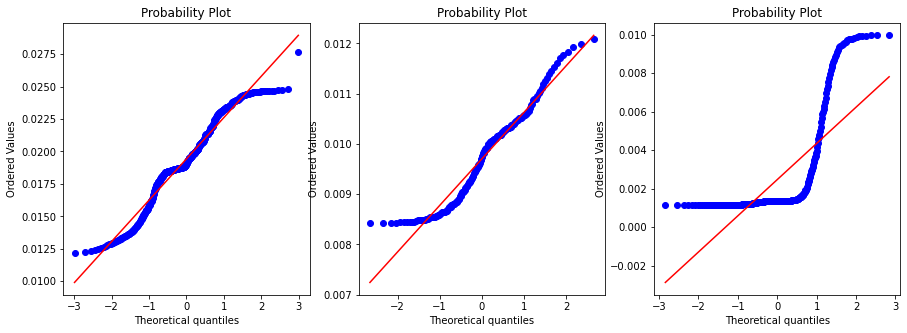

In [15]:
#2 치명률 데이터 분석 
print("[2. 치명률 데이터 분석]")
#타입변환
df_covid_etc = df_covid_etc.astype({'치명률' : 'float'})
df_covid_delta = df_covid_delta.astype({'치명률' : 'float'})
df_covid_omi = df_covid_omi.astype({'치명률' : 'float'})

#정규성 검증
print("[정규성 검증]")
test_stat, p_val = stats.shapiro(df_covid_etc["치명률"])
print("Shapiro Test-statistics : {}, p-value : {}".format(test_stat, p_val))
test_stat, p_val = stats.shapiro(df_covid_delta["치명률"])
print("Shapiro Test-statistics : {}, p-value : {}".format(test_stat, p_val))
test_stat, p_val = stats.shapiro(df_covid_omi["치명률"])
print("Shapiro Test-statistics : {}, p-value : {}".format(test_stat, p_val))
print()

#등분산 검증
print("[등분산 검증]")
test_stat, p_val = stats.bartlett(df_covid_etc["치명률"],df_covid_delta["치명률"],df_covid_omi["치명률"])
print("Bartlett Test-statistics : {}, p-value : {}".format(test_stat, p_val))
# test_stat, p_val = stats.fligner(df_covid_etc["계(명)"],df_covid_delta["계(명)"],df_covid_omi["계(명)"])
# print("Fligner Test-statistics : {}, p-value : {}".format(test_stat, p_val))
# test_stat, p_val = stats.levene(df_covid_etc["계(명)"],df_covid_delta["계(명)"],df_covid_omi["계(명)"])
# print("Levene Test-statistics : {}, p-value : {}".format(test_stat, p_val))

#Q-Q plot
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1) 
plt1 = stats.probplot(df_covid_etc["치명률"],dist=stats.norm, plot=plt)
ax2 = fig.add_subplot(1,3,2) 
plt2 = stats.probplot(df_covid_delta["치명률"],dist=stats.norm, plot=plt)
ax3 = fig.add_subplot(1,3,3) 
plt3 = stats.probplot(df_covid_omi["치명률"],dist=stats.norm, plot=plt)
print()

#정규성을 만족하지 않으므로 Kruskal-Wallis Test 실행
print("[Kruskal-Wallis Test]")
test_stat, p_val = stats.kruskal(df_covid_etc["치명률"], df_covid_delta["치명률"], df_covid_omi["치명률"])
print("Kruskal-Wallis Test-statistics : {}, p-value : {}".format(test_stat, p_val))
print()